In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import random
from PIL import Image


In [2]:
# Import MNIST data
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def what_is(x):
    if x[0][0] <= 0 and x[0][1] >= 1:
        return "square"
    return "circle"

In [3]:
train_split_perc = 0.85
#load datasets
input_s = np.load('square.npy')
input_c = np.load('circle.npy')
x = np.concatenate([input_s, input_c])
y = np.concatenate([np.repeat(np.array([0., 1.])[None, :], len(input_s), axis=0), np.repeat(np.array([1., 0.])[None, :], len(input_c), axis=0)])

x, y = unison_shuffled_copies(x,y)
train_split = int(train_split_perc * len(x))
train_x = x[:train_split]
train_y = y[:train_split]

test_x = x[train_split:]
test_y = y[train_split:]
#To see a circle or a square
#plt.imshow(input_s[0].reshape(28, 28), cmap='gray')
#plt.show()

#square = 0,1
#circle = 1,0


In [4]:
# Parameters
learning_rate = 0.01
training_epochs = 4
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 2 # MNIST total classes (0-9 digits)

In [5]:

# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [6]:
# Create model
def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [7]:

# Construct model
logits = multilayer_perceptron(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
# Initializing the variables
init = tf.global_variables_initializer()


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [8]:
sess = tf.Session()
total_batch = int(len(train_x)/batch_size)
sess.run(init)
# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0.
#        total_batch = int(mnist.train.num_examples/batch_size)
    # Loop over all batches
    for i in range(total_batch):
        #mnist batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        batch_x = train_x[batch_size * epoch: (batch_size * epoch) + batch_size]
        batch_y = train_y[batch_size * epoch: (batch_size * epoch) + batch_size]
        _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,
                                                        Y: batch_y})
        # Compute average loss
        avg_cost += c / total_batch
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
print("Optimization Finished!")

# Test model
pred = tf.nn.softmax(logits)  # Apply softmax to logits
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print("Accuracy:", accuracy.eval({X: test_x, Y: test_y},session=sess))


Epoch: 0001 cost=583.011873205
Epoch: 0002 cost=113.997090095
Epoch: 0003 cost=393.598734199
Epoch: 0004 cost=162.409019919
Optimization Finished!
Accuracy: 0.9060047


In [9]:
saver = tf.train.Saver()
saver.save(sess, './model.ckpt')
#restore
#sess = tf.Session()
#saver = tf.train.Saver()
#saver.restore(sess, 'model/model.ckpt')

'./model.ckpt'

square
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   1  34  80 125 171 217 236  51   0   0   0   0   0   4 221 184
  90   9   0   0  22  65  68  68  70 106 152 198 242 255 255 250 211 166
 246 133   0   0   0   0   0   0 225 250 255 240 189 219 255 255 255 255
 255 255 231 185 139  94  48   6   0   0 199 184   0   0   0   0   0   2
 248 129  57 148 193 165 109  58  51  51  51  21   0   0   0   0   0   0
   0   0 148 235   0   0   0   0   0  30 255  94   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0

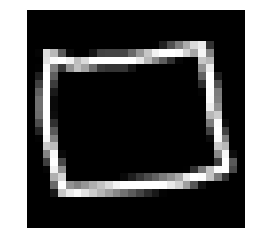

<Figure size 2016x2016 with 0 Axes>

In [11]:
r = int(random.random() * len(test_x))
x_ = test_x[r]

plt.imshow(x_.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.figure(figsize=(28,28))
y_ = logits.eval(feed_dict={X: [x_]}, session=sess)
print(what_is(y_))
#plt.show()
print(x_)
im = Image.fromarray(x_.reshape(28, 28))
im.save("image.png")

In [15]:
#test image
img = Image.open('circle.png')
im2arr = np.array(img)
arr_gray = np.zeros([28,28])
for x in range(im2arr.shape[0]):
    for y in range(im2arr.shape[0]):
        v = im2arr[x][y]
        g = 0.299 * v[0] + 0.587 * v[1] + 0.114 * v[2]
        arr_gray[x][y] = int(g)
#print(arr_gray.reshape(784))
x_ = arr_gray.reshape(784)
#plt.imshow(im2arr, cmap='gray')
#plt.show()
#x_ = im2arr.reshape(784)
y_ = logits.eval(feed_dict={X: [x_]}, session=sess)
what_is(y_)
x_

AttributeError: 'Tensor' object has no attribute 'predict'